In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy 
import timeit

In [2]:
def load_image(path_input):
    img = cv2.imread(path_input)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [3]:
path_image = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P2/dr_trump.jpg'

image = load_image(path_image)

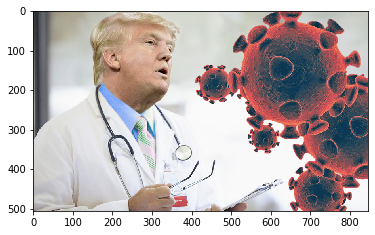

array([91, 91, 89], dtype=uint8)

In [4]:
pixels = np.array(image)
pixels_gray = copy.deepcopy(pixels) 
pixels_cmyk = copy.deepcopy(pixels) 
pixels_yuv = copy.deepcopy(pixels) 
pixels_hsv = copy.deepcopy(pixels)
pixels_hsl = copy.deepcopy(pixels)

plt.imshow(pixels)
plt.show()
pixels_gray[0][0]

# GrayScale 

In [5]:
def grayScale(pixel):
    I = 0.299 * pixel[0] + 0.587* pixel[1] + 0.114* pixel[2]
    return I

Time grayScale:  2.0334939999999904


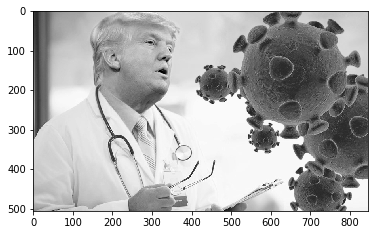

In [6]:
height, width, channels = pixels.shape
grayimg = np.zeros([height, width], dtype=np.uint8)


start = timeit.default_timer()

for i in range(height):
    for j in range(width):
        grayimg[i,j] = grayScale(pixels_gray[i,j])   

stop = timeit.default_timer()

print('Time grayScale: ', stop - start)  
plt.imshow(grayimg, cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
grayimg.shape

(505, 846)

# CMYK Image

In [8]:
rgb_scale = 255
cmyk_scale = 100

def CMYK(pixel):
    if (pixel[0] == 0) and (pixel[1] == 0) and (pixel[2] == 0):
        # black
        return 0, 0, 0, cmyk_scale
    
    r_hat = pixel[0]/float(rgb_scale)
    g_hat = pixel[1]/float(rgb_scale)
    b_hat = pixel[2]/float(rgb_scale)
    
    K = 1 - max(r_hat,g_hat,b_hat)
    C = (1 - r_hat - K)/(1 - K)
    M = (1 - g_hat - K)/(1 - K)
    Y = (1 - b_hat - K)/(1 - K)
    return C,M,Y,K


Time CMYK:  3.597860300000008


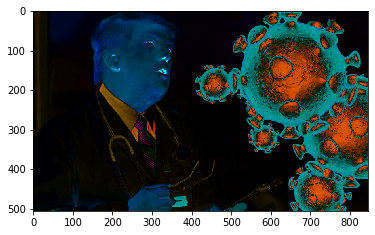

In [9]:
height, width, channels = pixels.shape
img_cmyk = np.zeros((height,width,3))

start = timeit.default_timer()
for i in range(height):
    for j in range(width):
        c,m,y,k = CMYK(pixels_cmyk[i,j])
        img_cmyk[i,j,0] = c
        img_cmyk[i,j,1] = m
        img_cmyk[i,j,2] = y

stop = timeit.default_timer()

print('Time CMYK: ', stop - start)  

plt.imshow(img_cmyk)
plt.show()

# YUV Image

In [10]:
def YUV(pixel):
    K = 0.299 * pixel[0] + 0.587* pixel[1] + 0.114* pixel[2]
    Y = round(0.859*K) + 16
    U = round(0.496 * (pixel[0] - K)) + 128
    V = round(0.627* (pixel[2] - K)) + 128
    return Y,U,V

Time YUV:  5.883556799999994


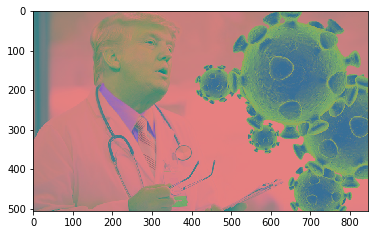

In [11]:
height, width, channels = pixels.shape
img_yuv = np.zeros((height,width,3))

start = timeit.default_timer()
for i in range(height):
    for j in range(width):
        y,u,v = YUV(pixels_yuv[i,j])
        img_yuv.itemset((i,j,0),int(y))
        img_yuv.itemset((i,j,1),int(u))
        img_yuv.itemset((i,j,2),int(v))
        
stop = timeit.default_timer()

print('Time YUV: ', stop - start)          

plt.imshow((img_yuv).astype(np.uint8))
plt.show()

# HSV Image

In [21]:
def HSV(pixel):
    r_hat = pixel[0]/255.
    g_hat = pixel[1]/255.
    b_hat = pixel[2]/255.
    
    Cmax = max(r_hat,g_hat,b_hat)
    Cmin = min(r_hat,g_hat,b_hat)
    
    delta = Cmax-Cmin
    
    if delta == 0:
        H = 0
    elif Cmax == r_hat :
        H = 60 * (((g_hat - b_hat)/delta) % 6)
    elif Cmax == g_hat:
        H = 60 * (((b_hat - r_hat)/delta) + 2)
    elif Cmax == b_hat:
        H = 60 * (((r_hat - g_hat)/delta) + 4)
        
    if Cmax == 0:
        S = 0
    else :
        S = delta / Cmax
        
    V = Cmax 

    return H, S, V

Time HSV:  2.9365647000000195


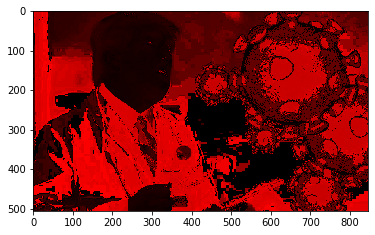

In [22]:
height, width, channels = pixels.shape
img_hsv = np.zeros((height,width,3))

start = timeit.default_timer()
for i in range(height):
    for j in range(width):
        h,s,v = HSV(pixels_hsv[i,j])
        img_hsv[i,j,0] = h
        img_hsv[i,j,1] = s
        img_hsv[i,j,2] = v
    
stop = timeit.default_timer()

print('Time HSV: ', stop - start)      

plt.imshow((img_hsv).astype(np.uint8))
plt.show()

In [14]:
HUE = img_hsv[:, :, 0]           
SAT = img_hsv[:, :, 1]
VAL = img_hsv[:, :, 2]

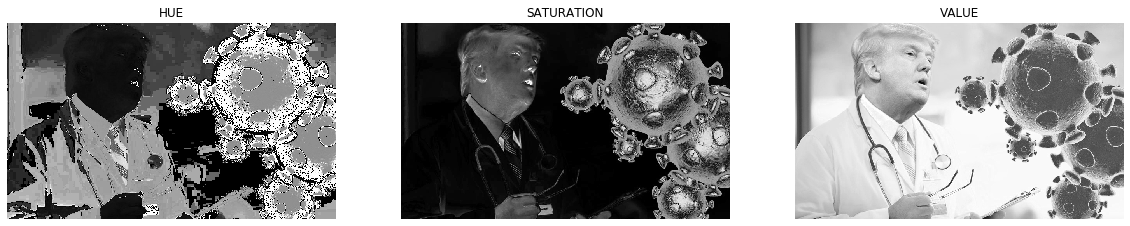

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)             
plt.imshow(HUE, cmap='gray')
plt.title('HUE')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(SAT, cmap='gray')
plt.title('SATURATION')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(VAL, cmap='gray')
plt.title('VALUE')
plt.axis('off')
plt.show()

# HSL Image

In [16]:
def HSL(pixel):
    r_hat = pixel[0]/255.
    g_hat = pixel[1]/255.
    b_hat = pixel[2]/255.
    
    Cmax = max(r_hat,g_hat,b_hat)
    Cmin = min(r_hat,g_hat,b_hat)
    
    delta = Cmax-Cmin
    
    if delta == 0:
        H = 0
    elif Cmax == r_hat :
        H = 60 * (((g_hat - b_hat)/delta) % 6)
    elif Cmax == g_hat:
        H = 60 * (((b_hat - r_hat)/delta) + 2)
    elif Cmax == b_hat:
        H = 60 * (((r_hat - g_hat)/delta) + 4)
        
    L = (Cmax + Cmin)/2.
        
    if delta == 0:
        S = 0
    else :
        S = delta / (1 - abs(2*L - 1))
        


    return H, S, L

Time HSL:  3.2300134000000043


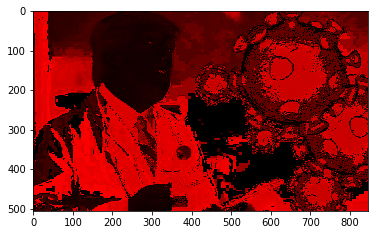

In [17]:
height, width, channels = pixels.shape
img_hsl = np.zeros((height,width,3))

start = timeit.default_timer()
for i in range(height):
    for j in range(width):
        h,s,l = HSL(pixels_hsl[i,j])
        img_hsl[i,j,0] = h
        img_hsl[i,j,1] = s
        img_hsl[i,j,2] = l
        
stop = timeit.default_timer()

print('Time HSL: ', stop - start)   

plt.imshow((img_hsl).astype(np.uint8))
plt.show()

In [18]:
HUE_s = img_hsl[:, :, 0]             
SAT_s = img_hsl[:, :, 1]
VAL_s = img_hsl[:, :, 2]

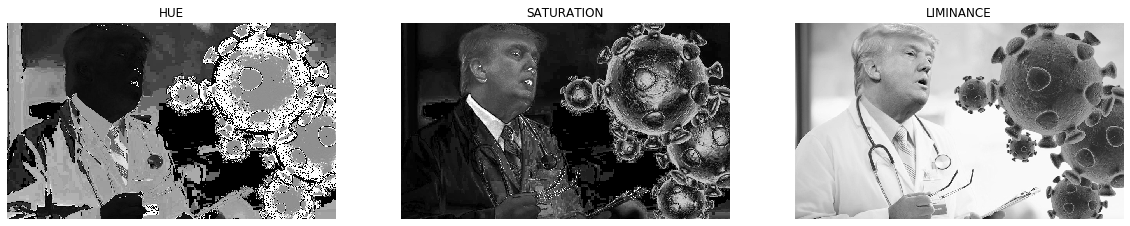

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)              
plt.imshow(HUE_s, cmap='gray')
plt.title('HUE')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(SAT_s, cmap='gray')
plt.title('SATURATION')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(VAL_s, cmap='gray')
plt.title('LIMINANCE')
plt.axis('off')
plt.show()